This code is generated with help from the toolbox in machine learning, the introduction to statistics book, geeks for greeks and ChatGPT. 

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GroupKFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error, r2_score
import warnings

# Load dataset and convert to binary 

In [11]:
data_path = "/Users/k/Documents/GitHub/project_stat_ML_25/HR_data-kopi.csv"  # Use this exact path in your notebook
df = pd.read_csv(data_path)

df

,Unnamed: 0,HR_Mean,HR_Median,HR_std,HR_Min,HR_Max,HR_AUC,Round,Phase,Individual,Puzzler,Frustrated,Cohort
0,0,77.965186,78.000,3.345290,73.23,83.37,22924.945,round_3,phase3,1,1,1,D1_1
1,1,70.981097,70.570,2.517879,67.12,78.22,21930.400,round_3,phase2,1,1,5,D1_1
2,2,73.371959,73.360,3.259569,67.88,80.22,21647.085,round_3,phase1,1,1,0,D1_1
3,3,78.916822,77.880,4.054595,72.32,84.92,25258.905,round_2,phase3,1,1,1,D1_1
4,4,77.322226,74.550,6.047603,70.52,90.15,23890.565,round_2,phase2,1,1,5,D1_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,163,73.594539,72.380,9.474556,57.43,93.53,21482.985,round_4,phase2,14,0,8,D1_2
164,164,57.839897,54.130,6.796647,52.97,74.14,16825.740,round_4,phase1,14,0,0,D1_2
165,165,64.237295,65.195,3.589241,58.97,72.63,18691.065,round_1,phase3,14,0,1,D1_2
166,166,70.834320,70.440,2.391160,66.65,76.07,20753.005,round_1,phase2,14,0,4,D1_2


In [12]:
# Define which columns are your input features
features = ['HR_Mean', 'HR_Median', 'HR_std', 'HR_Min', 'HR_Max', 'HR_AUC']

X = df[features]

In [13]:
# Converts frustration into binary
# Create binary classification target
# For example, 6 or above = high frustration (1), below 6 = low (0)
df['Frustrated_binary'] = (df['Frustrated'] >= 6).astype(int)

In [14]:
# target, when binary label. Created from the original 'Frustrated' score
y = df['Frustrated_binary']  # or 'Frustrated' if doing regression

In [15]:
from sklearn.model_selection import GroupKFold

# Input features and target
X = df[features]
y = df['Frustrated_binary']
groups = df['Individual']  # Group by individual so no leakage!

# Cross-validation setup
cv = GroupKFold(n_splits=5)

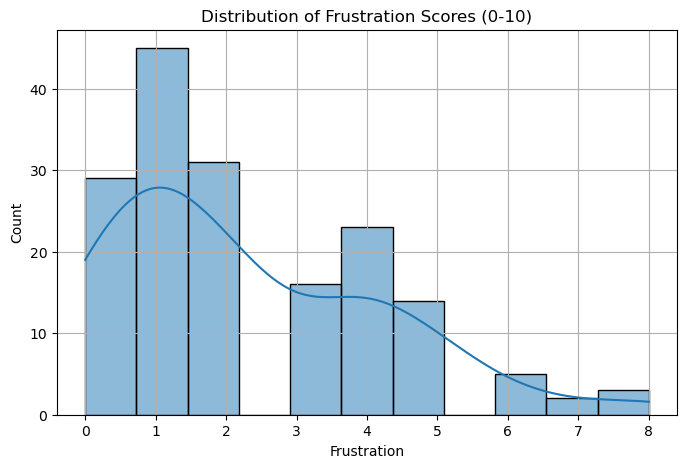

In [16]:
# visualization the distribution of 'Frustrated' 

plt.figure(figsize=(8, 5))
sns.histplot(df['Frustrated'], bins=11, kde=True)
plt.title('Distribution of Frustration Scores (0-10)')
plt.xlabel('Frustration')
plt.ylabel('Count')
plt.grid(True)
plt.show()

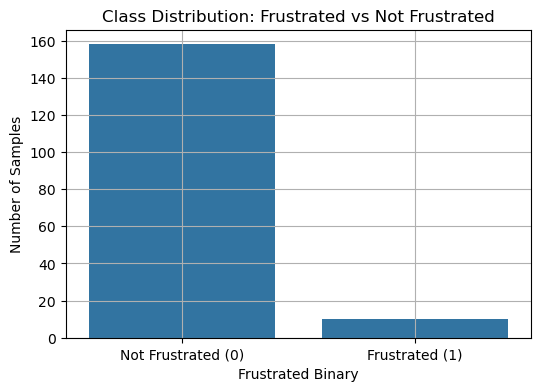

In [17]:
# Visualization of 'Frustrated Binary' 

plt.figure(figsize=(6, 4))
sns.countplot(x='Frustrated_binary', data=df)
plt.title('Class Distribution: Frustrated vs Not Frustrated')
plt.xlabel('Frustrated Binary')
plt.ylabel('Number of Samples')
plt.xticks([0, 1], ['Not Frustrated (0)', 'Frustrated (1)'])
plt.grid(True)
plt.show()

# Random Forest

In [18]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GroupKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


Fold 1
  Accuracy: 86.11%

Fold 2
  Accuracy: 100.00%

Fold 3
  Accuracy: 91.67%

Fold 4
  Accuracy: 94.44%

Fold 5
  Accuracy: 95.83%

 Average GroupKFold Accuracy: 93.61%

 Confusion Matrix (All Folds Combined):
  True Negative (0→0): 157
  False Positive (0→1): 1
  False Negative (1→0): 10
  True Positive (1→1): 0

 Classification Report:
                    precision    recall  f1-score   support

Not Frustrated (0)       0.94      0.99      0.97       158
    Frustrated (1)       0.00      0.00      0.00        10

          accuracy                           0.93       168
         macro avg       0.47      0.50      0.48       168
      weighted avg       0.88      0.93      0.91       168



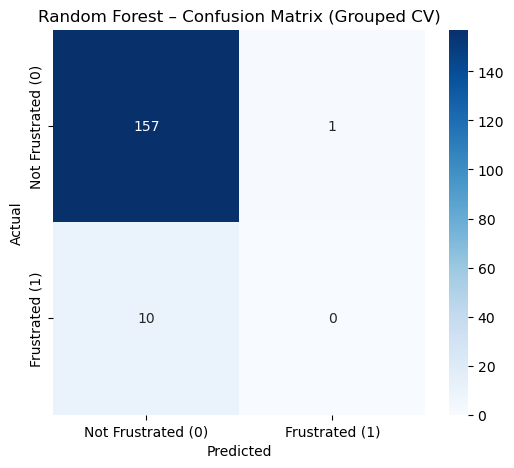

In [19]:
from sklearn.model_selection import GroupKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

features = ['HR_Mean', 'HR_Median', 'HR_std', 'HR_Min', 'HR_Max', 'HR_AUC']
X = df[features]
y = df['Frustrated_binary']
groups = df['Individual']

cv = GroupKFold(n_splits=5)

all_y_true = []
all_y_pred = []
accuracies = []

for fold, (train_idx, test_idx) in enumerate(cv.split(X, y, groups)):
    print(f"\nFold {fold+1}")
    
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Scale within fold only (no leakage!)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train Random Forest
    rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
    rf.fit(X_train_scaled, y_train)

    # Predict and evaluate
    y_pred = rf.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)

    print(f"  Accuracy: {acc * 100:.2f}%")
    accuracies.append(acc)
    all_y_true.extend(y_test)
    all_y_pred.extend(y_pred)

avg_acc = np.mean(accuracies)
conf_matrix = confusion_matrix(all_y_true, all_y_pred)

print(f"\n Average GroupKFold Accuracy: {avg_acc * 100:.2f}%")

print("\n Confusion Matrix (All Folds Combined):")
print(f"  True Negative (0→0): {conf_matrix[0,0]}")
print(f"  False Positive (0→1): {conf_matrix[0,1]}")
print(f"  False Negative (1→0): {conf_matrix[1,0]}")
print(f"  True Positive (1→1): {conf_matrix[1,1]}")

print("\n Classification Report:")
print(classification_report(all_y_true, all_y_pred, target_names=['Not Frustrated (0)', 'Frustrated (1)']))

# confusion matrix 
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Frustrated (0)', 'Frustrated (1)'],
            yticklabels=['Not Frustrated (0)', 'Frustrated (1)'])
plt.title('Random Forest – Confusion Matrix (Grouped CV)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Deep Neural Network 


Fold 1
  Accuracy: 77.78%

Fold 2
  Accuracy: 100.00%

Fold 3
  Accuracy: 88.89%

Fold 4
  Accuracy: 94.44%

Fold 5
  Accuracy: 83.33%

 Average GroupKFold Accuracy (MLP): 88.89%

 Confusion Matrix (All Folds Combined):
  True Negative (0→0): 150
  False Positive (0→1): 8
  False Negative (1→0): 10
  True Positive (1→1): 0

 Classification Report (MLP):
                    precision    recall  f1-score   support

Not Frustrated (0)       0.94      0.95      0.94       158
    Frustrated (1)       0.00      0.00      0.00        10

          accuracy                           0.89       168
         macro avg       0.47      0.47      0.47       168
      weighted avg       0.88      0.89      0.89       168



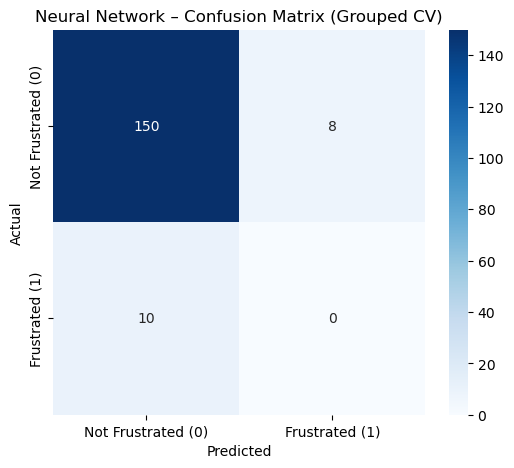

In [20]:
from sklearn.model_selection import GroupKFold
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

features = ['HR_Mean', 'HR_Median', 'HR_std', 'HR_Min', 'HR_Max', 'HR_AUC']
X = df[features]
y = df['Frustrated_binary']
groups = df['Individual']

cv = GroupKFold(n_splits=5)

all_y_true = []
all_y_pred = []
accuracies = []

for fold, (train_idx, test_idx) in enumerate(cv.split(X, y, groups)):
    print(f"\nFold {fold+1}")

    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    mlp = MLPClassifier(hidden_layer_sizes=(32, 16), 
                        max_iter=500, 
                        random_state=42,
                        early_stopping=True)
    
    mlp.fit(X_train_scaled, y_train)

    y_pred = mlp.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)

    print(f"  Accuracy: {acc * 100:.2f}%")
    accuracies.append(acc)
    all_y_true.extend(y_test)
    all_y_pred.extend(y_pred)

# eval
avg_acc = np.mean(accuracies)
conf_matrix = confusion_matrix(all_y_true, all_y_pred)

print(f"\n Average GroupKFold Accuracy (MLP): {avg_acc * 100:.2f}%")

print("\n Confusion Matrix (All Folds Combined):")
print(f"  True Negative (0→0): {conf_matrix[0,0]}")
print(f"  False Positive (0→1): {conf_matrix[0,1]}")
print(f"  False Negative (1→0): {conf_matrix[1,0]}")
print(f"  True Positive (1→1): {conf_matrix[1,1]}")

print("\n Classification Report (MLP):")
print(classification_report(all_y_true, all_y_pred, target_names=['Not Frustrated (0)', 'Frustrated (1)']))

# confusion matrix 
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Frustrated (0)', 'Frustrated (1)'],
            yticklabels=['Not Frustrated (0)', 'Frustrated (1)'])
plt.title('Neural Network – Confusion Matrix (Grouped CV)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Statistical analysis (comparison)

In [21]:
from scipy.stats import ttest_rel

# Example fold-wise accuracies (replace with yours)
rf_accuracies = [0.86, 1.00, 0.92, 0.94, 0.96]
dnn_accuracies = [0.78, 1.00, 0.89, 0.94, 0.83]

# Paired t-test
t_stat, p_value = ttest_rel(rf_accuracies, dnn_accuracies)

print(f"Paired t-test: t = {t_stat:.2f}, p = {p_value:.3f}")

Paired t-test: t = 1.91, p = 0.129


In [28]:
# to make cohen's d after the paired t-test

rf = np.array(rf_accuracies)
dnn = np.array(dnn_accuracies)

diff = rf - dnn

mean_diff = np.mean(diff)
std_diff = np.std(diff, ddof=1) 

cohens_d = mean_diff / std_diff

print(f"Cohen's d: {cohens_d:.2f}")

Cohen's d: 0.85


t-statistic: 1.90632
p-value: 0.12929
Mean difference: 0.04800
95% Confidence interval: (-0.02191, 0.11791)


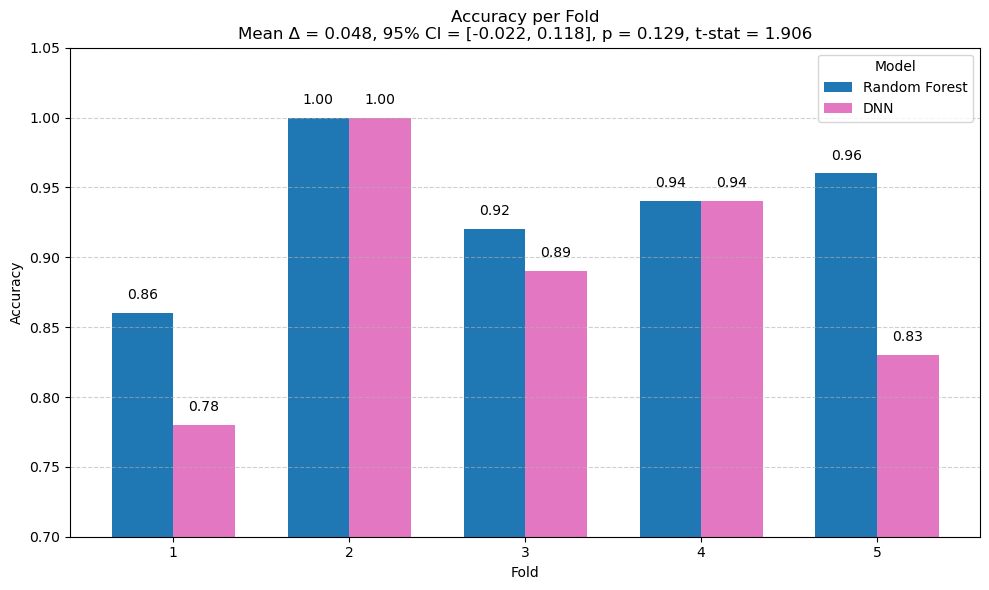

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

rf_acc = np.array([0.86, 1.00, 0.92, 0.94, 0.96])
dnn_acc = np.array([0.78, 1.00, 0.89, 0.94, 0.83])

# paired differences
diffs = rf_acc - dnn_acc

# null hypothesis mean difference
mu_0 = 0.0

# one-sample t-test on the differences vs mu_0
t_stat, p_value = stats.ttest_1samp(diffs, popmean=mu_0)

# 95% ci
n = len(diffs)
mean_diff = np.mean(diffs)
std_diff = np.std(diffs, ddof=1)
se = std_diff / np.sqrt(n)
t_crit = stats.t.ppf(1 - 0.05/2, df=n-1)

ci_lower = mean_diff - t_crit * se
ci_upper = mean_diff + t_crit * se

print(f"t-statistic: {t_stat:.5f}")
print(f"p-value: {p_value:.5f}")
print(f"Mean difference: {mean_diff:.5f}")
print(f"95% Confidence interval: ({ci_lower:.5f}, {ci_upper:.5f})")

# plots
folds = np.arange(1, n+1)
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(folds - width/2, rf_acc, width=width, label='Random Forest', color='tab:blue')
plt.bar(folds + width/2, dnn_acc, width=width, label='DNN', color='tab:pink')

plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.ylim(0.7, 1.05)
plt.xticks(folds)
plt.title(f'Accuracy per Fold\nMean Δ = {mean_diff:.3f}, 95% CI = [{ci_lower:.3f}, {ci_upper:.3f}], p = {p_value:.3f}, t-stat = {t_stat:.3f}')
plt.legend(title='Model')

for i in range(n):
    plt.text(folds[i] - width/2, rf_acc[i] + 0.01, f"{rf_acc[i]:.2f}", ha='center')
    plt.text(folds[i] + width/2, dnn_acc[i] + 0.01, f"{dnn_acc[i]:.2f}", ha='center')

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [24]:
from sklearn.ensemble import RandomForestClassifier

# Assume you've trained this:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Feature importance
rf_importance = rf_model.feature_importances_
rf_importance

array([0.18817969, 0.15259877, 0.1848256 , 0.16382855, 0.16730039,
       0.14326699])

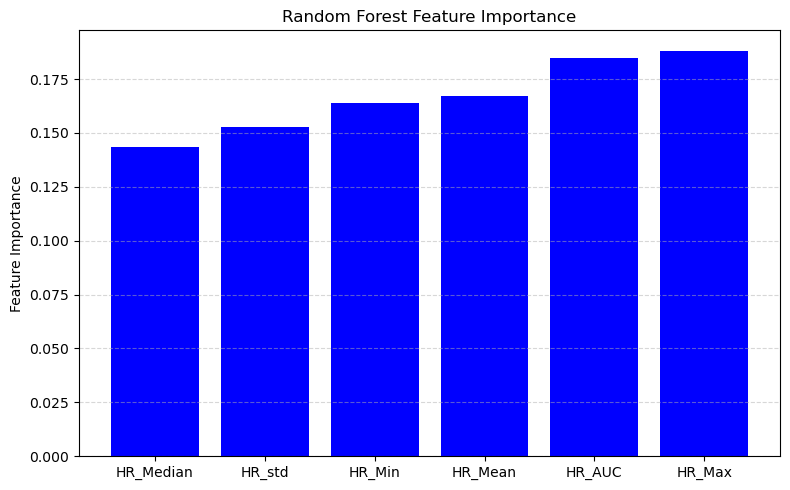

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Your features and importances
features = ['HR_Max', 'HR_std', 'HR_AUC', 'HR_Min', 'HR_Mean', 'HR_Median']

# Sort the features by importance
sorted_idx = np.argsort(rf_importance)
sorted_features = np.array(features)[sorted_idx]
sorted_importance = rf_importance[sorted_idx]

# Plot vertical bar chart
plt.figure(figsize=(8, 5))
plt.bar(sorted_features, sorted_importance, color='blue')
plt.ylabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [26]:
!pip install shap

/opt/anaconda3/envs/IntelligentSystems/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/var/folders/jm/jjk46zh54kvds86ny7q7_fgm0000gn/T/ipykernel_40426/2959508353.py:42: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0,0].boxplot([X_sample[:, i] for i in range(X_sample.shape[1])],


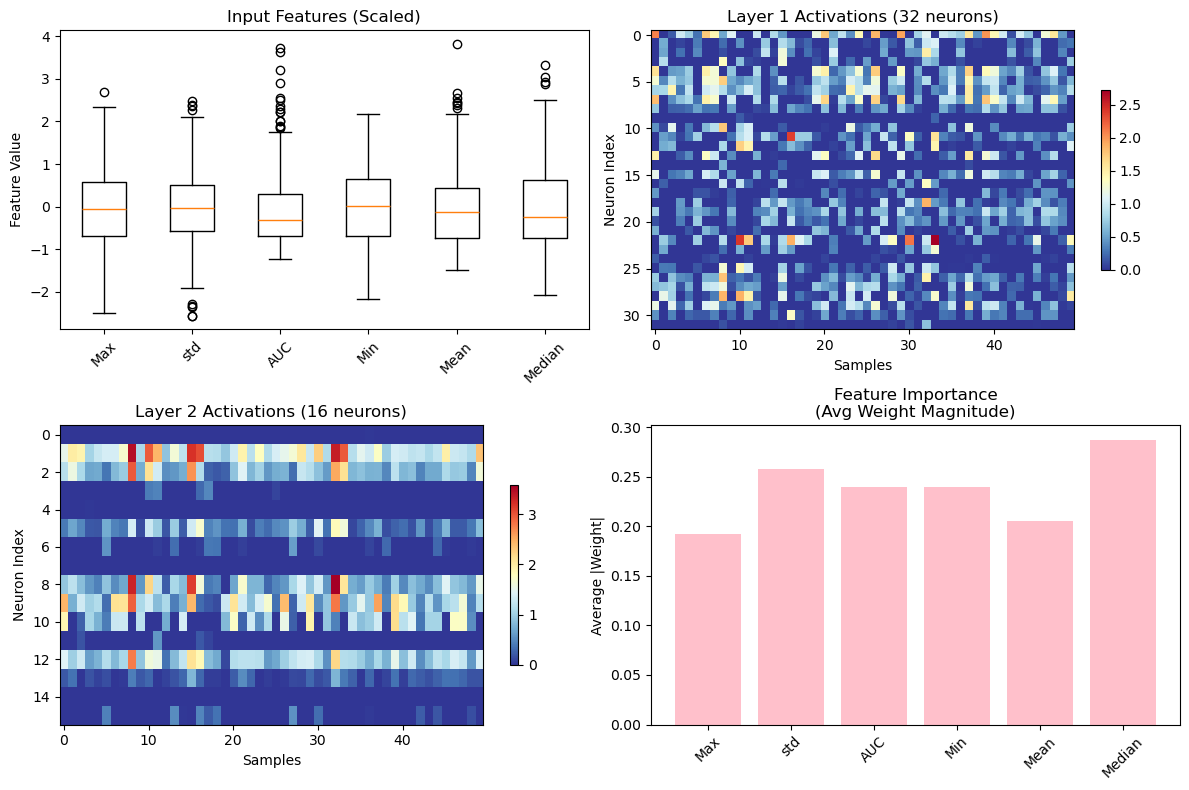

MLP FEATURE TRANSFORMATION SUMMARY
Input features: 6
Layer 1: 32 neurons
Layer 2: 16 neurons
Output: 1 neuron (binary classification)

Most important features:
  1. HR_Median: 0.287
  2. HR_std: 0.258
  3. HR_Min: 0.240

Layer activation stats:
  Layer 1 - Active neurons: 51.9%
  Layer 2 - Active neurons: 51.9%


In [27]:
# SHORT CODE: MLP Feature Transformation Visualization
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Use the last trained model from your CV loop (or train a quick one)
# If you don't have 'mlp' in memory, train a quick model:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
mlp = MLPClassifier(hidden_layer_sizes=(32, 16), max_iter=500, random_state=42)
mlp.fit(X_scaled, y)

# Get feature transformations at each layer
def get_layer_outputs(model, X_input):
    """Extract outputs from each hidden layer"""
    layer_outputs = []
    current_input = X_input
    
    # Go through each layer
    for i, (weights, bias) in enumerate(zip(model.coefs_[:-1], model.intercepts_[:-1])):
        # Linear transformation
        linear_output = current_input @ weights + bias
        # Apply ReLU activation
        activated_output = np.maximum(0, linear_output)
        layer_outputs.append(activated_output)
        current_input = activated_output
    
    return layer_outputs

# Get layer outputs for a sample of data (adjust sample size to dataset)
sample_size = min(200, len(X_scaled))  # Use all data if less than 200 samples
sample_indices = np.random.choice(len(X_scaled), sample_size, replace=False)
X_sample = X_scaled[sample_indices]
y_sample = y.iloc[sample_indices]

layer_outputs = get_layer_outputs(mlp, X_sample)

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# 1. Input features distribution
axes[0,0].boxplot([X_sample[:, i] for i in range(X_sample.shape[1])], 
                  labels=[f.replace('HR_', '') for f in features])
axes[0,0].set_title('Input Features (Scaled)')
axes[0,0].set_ylabel('Feature Value')
axes[0,0].tick_params(axis='x', rotation=45)

# 2. First hidden layer (32 neurons)
display_samples = min(50, sample_size)  # Adjust display samples
layer1_sample = layer_outputs[0][:display_samples]
im1 = axes[0,1].imshow(layer1_sample.T, aspect='auto', cmap='RdYlBu_r')
axes[0,1].set_title('Layer 1 Activations (32 neurons)')
axes[0,1].set_xlabel('Samples')
axes[0,1].set_ylabel('Neuron Index')
plt.colorbar(im1, ax=axes[0,1], shrink=0.6)

# 3. Second hidden layer (16 neurons)
layer2_sample = layer_outputs[1][:display_samples]
im2 = axes[1,0].imshow(layer2_sample.T, aspect='auto', cmap='RdYlBu_r')
axes[1,0].set_title('Layer 2 Activations (16 neurons)')
axes[1,0].set_xlabel('Samples')
axes[1,0].set_ylabel('Neuron Index')
plt.colorbar(im2, ax=axes[1,0], shrink=0.6)

# 4. Feature importance via weight magnitudes
# 4. Feature importance via weight magnitudes
weights_layer1 = np.abs(mlp.coefs_[0])  # 6 features -> 32 neurons
feature_importance = np.mean(weights_layer1, axis=1)

axes[1,1].bar(range(len(features)), feature_importance, color='pink')  # changed here
axes[1,1].set_xticks(range(len(features)))
axes[1,1].set_xticklabels([f.replace('HR_', '') for f in features], rotation=45)
axes[1,1].set_title('Feature Importance\n(Avg Weight Magnitude)')
axes[1,1].set_ylabel('Average |Weight|')

plt.tight_layout()
plt.show()

# Quick summary
print("="*40)
print("MLP FEATURE TRANSFORMATION SUMMARY")
print("="*40)
print(f"Input features: {X_sample.shape[1]}")
print(f"Layer 1: {layer_outputs[0].shape[1]} neurons")
print(f"Layer 2: {layer_outputs[1].shape[1]} neurons")
print(f"Output: 1 neuron (binary classification)")

print(f"\nMost important features:")
importance_order = np.argsort(feature_importance)[::-1]
for i, idx in enumerate(importance_order[:3]):
    print(f"  {i+1}. {features[idx]}: {feature_importance[idx]:.3f}")

# Show activation statistics
print(f"\nLayer activation stats:")
print(f"  Layer 1 - Active neurons: {np.mean(layer_outputs[0] > 0)*100:.1f}%")
print(f"  Layer 2 - Active neurons: {np.mean(layer_outputs[1] > 0)*100:.1f}%")